# Praca domowa nr 8

- Dane to tej pracy domowej to lista top 5000 albumów muzycznych wg portalu [rateyourmusic.com](https://rateyourmusic.com). Dataset wraz z opisem można znaleźć na [Kaggle'u](https://www.kaggle.com/datasets/michaelbryantds/top-5000-albums-of-all-time-rateyourmusiccom). 
- Dane znajdują się też w katalogu z pracą domową - nazwa pliku to `rym_top5000.csv`.  

## Zadanie 1 - `numpy` + `pandas` (2 pkt)
Używając funkcji z pakietów `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o albumach muzycznych.

In [64]:
import numpy as np
import pandas as pd

In [65]:
import warnings
warnings.filterwarnings('ignore') # nie chcemy errorow ze znaczkow

In [66]:
df = pd.read_csv("../rym_top5000.csv", thousands=",")
df["Release Date"] = pd.to_datetime(df["Release Date"])

In [67]:
df.head()

,Ranking,Album,Artist Name,Release Date,Genres,Descriptors,Average Rating,Number of Ratings,Number of Reviews
0,1.0,OK Computer,Radiohead,1997-06-16,"Alternative Rock, Art Rock","melancholic, anxious, futuristic, alienation, ...",4.23,70382,1531
1,2.0,Wish You Were Here,Pink Floyd,1975-09-12,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, male vo...",4.29,48662,983
2,3.0,In the Court of the Crimson King,King Crimson,1969-10-10,"Progressive Rock, Art Rock","fantasy, epic, progressive, philosophical, com...",4.30,44943,870
3,4.0,Kid A,Radiohead,2000-10-03,"Art Rock, Experimental Rock, Electronic","cold, melancholic, futuristic, atmospheric, an...",4.21,58590,734
4,5.0,To Pimp a Butterfly,Kendrick Lamar,2015-03-15,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","political, conscious, poetic, protest, concept...",4.27,44206,379


#### Jacy artyści z ponad 5 albumami na liście mają największą medianę ocen dla swoich albumów? Podaj top 10.

In [68]:
aggregated = df.groupby("Artist Name").agg(median=('Average Rating', 'median'),
                                albums=('Ranking', 'count')).reset_index()

aggregated.loc[aggregated.albums > 5].sort_values("albums", ascending=False).head(10)

,Artist Name,median,albums
2560,Various Artists,3.780,25
1502,Miles Davis,3.840,17
1124,John Coltrane,3.905,14
2490,Tom Waits,3.810,13
1142,John Williams,3.780,12
276,Bob Dylan,3.890,11
2233,The Beatles,4.045,10
973,Herbie Hancock,3.780,9
722,Ennio Morricone,3.880,9
2288,The Fall,3.760,9


#### Jacy artyści mają największą różnicę między najgorszym i najlepszym średnim ratingiem dla swojego albumu? Podaj top 10  oraz najwyższą i najniższą ocenę dla każdego z tych artystów. 

In [69]:
df_rating = df.groupby("Artist Name").agg(BestRating = ("Average Rating", "max"),
                        WorstRating = ("Average Rating", "min")).reset_index()

df_rating["RatingDiff"] = df_rating["BestRating"] - df_rating["WorstRating"]

df_rating.sort_values("RatingDiff", ascending=False).head(10)

,Artist Name,BestRating,WorstRating,RatingDiff
1213,Kendrick Lamar,4.27,3.52,0.75
2233,The Beatles,4.25,3.55,0.70
1782,Pink Floyd,4.29,3.60,0.69
1562,My Bloody Valentine,4.24,3.58,0.66
1228,King Crimson,4.30,3.67,0.63
1124,John Coltrane,4.30,3.70,0.60
1844,Radiohead,4.23,3.66,0.57
1502,Miles Davis,4.23,3.69,0.54
2266,The Cure,4.17,3.63,0.54
1197,Kanye West,4.07,3.54,0.53


#### Podaj top 10 albumów o największym stosunku liczby ocen do liczby recenzji. Weź pod uwagę tylko albumy o przynajmniej 5000 ocenach i 15 recenzjach.

In [70]:
top_albums = df.loc[df["Number of Reviews"] >= 15].loc[df["Number of Ratings"] >= 5000]
top_albums["Ratio"] =  top_albums["Number of Ratings"]/top_albums["Number of Reviews"]

sorted_top_albums = top_albums.sort_values("Ratio", ascending=False).head(10)[["Album", "Ratio"]]
sorted_top_albums

,Album,Ratio
353,Jenny Death: The Powers That B Disc 2,361.833333
1695,Bury Me at Makeout Creek,308.210526
3733,春と修羅 (Haru to Shura),272.913043
4949,Saturation,251.842857
1036,Saturation III,251.735294
2489,Scenery,248.666667
643,Endless,228.487179
2869,Imperial,225.420000
950,Saturation II,215.552941
439,Bottomless Pit,202.098039


#### Z których lat pochodzi najwięcej albumów na liście najpopularniejszych wśród krytyków i najpopularniejszych wśród oceniających? 
a) Podaj 5 lat, w których wydano najwięcej albumów z listy mających liczbę recenzji większą niż Q3 (trzeci kwartyl).

b) Podaj 5 lat, w których wydano najwięcej albumów z listy mających liczbę ocen większą niż Q3 (trzeci kwartyl).


In [71]:
df["Year"] = df["Release Date"].dt.strftime('%Y')

df.loc[df["Number of Reviews"] > df["Number of Reviews"].quantile(0.75)].groupby("Year").\
    size().reset_index().sort_values(0, ascending=False).head(5).rename(columns = {0: "number of albums with the greatest number of reviews"})

,Year,number of albums with the greatest number of reviews
13,1970,43
14,1971,41
12,1969,38
37,1994,36
38,1995,34


In [72]:

df.loc[df["Number of Ratings"] > df["Number of Ratings"].quantile(0.75)].groupby("Year").\
    size().reset_index().sort_values(0, ascending=False).head(5).rename(columns = {0: "number of albums with the greatest number of ratings"})

,Year,number of albums with the greatest number of ratings
37,1994,41
14,1971,36
13,1970,35
39,1996,34
38,1995,33


## Zadanie 2 - wizualizacja (3 pkt)
- Za pomocą pakietów `matplotlib` i `seaborn` stwórz dwa wykresy. 
- Wykorzystaj funkcję `matplotlib.pyplot.subplots`, by umieścić je we wspólnej figurze. 
- Jeden z wykresów ma opierać się na wynikach z zadania 1 - wizualizować odpowiedź na wybrane pytanie. 
- Drugi wykres może mieć dowolną tematykę, ale ma być powiązany z wcześniejszym, tak by figura mogła mieć wspólny tytuł.

In [73]:
# here we check artist with best ratio Ratings/Reviews

top_artists = df.loc[df["Number of Reviews"] >= 15].loc[df["Number of Ratings"] >= 5000].\
    groupby("Artist Name").agg({"Number of Ratings":"sum", "Number of Reviews": "sum"}).reset_index()
top_artists["Ratio"] =  top_artists["Number of Ratings"]/top_artists["Number of Reviews"]

sorted_top_artists = top_artists.sort_values("Ratio", ascending=False).head(10)[["Artist Name", "Ratio"]].\
    rename(columns={"Artist Name": "ArtistName"})
sorted_top_artists

,ArtistName,Ratio
341,Mitski,308.210526
633,春ねむり [Haru Nemuri],272.913043
635,福居良 [Ryo Fukui],248.666667
75,Brockhampton,237.977578
289,King Gizzard & the Lizard Wizard,201.526316
49,Billy Woods & Kenny Segal,185.676471
630,フィッシュマンズ,180.135135
145,Denzel Curry,177.707317
446,SZA,176.392157
283,Kero Kero Bonito,168.333333


Text(0.5, 0.98, 'Artists and songs with best ratio of number of reviews to number of ratings')

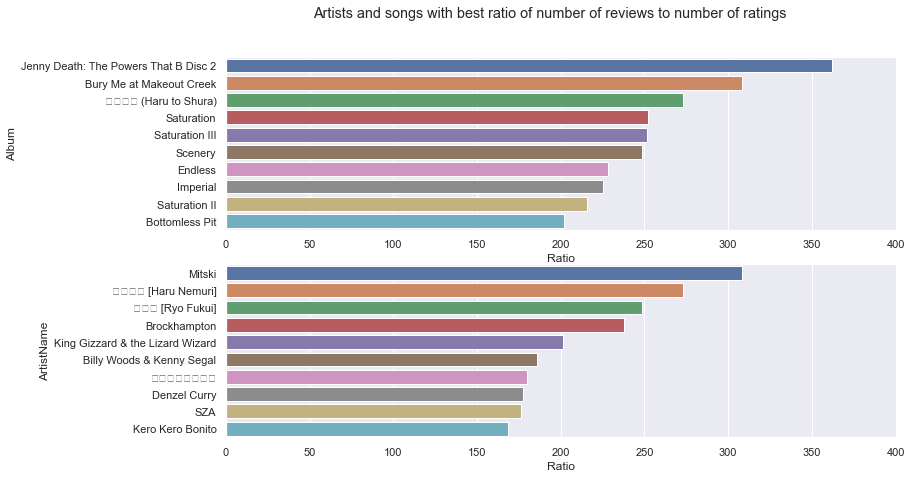

In [74]:
import matplotlib.pyplot as plt, seaborn as sns

sns.set(rc = {'figure.figsize': (12,7)})
sns.set_style("darkgrid")
pd.options.display.max_rows = 10
pd.set_option('display.width', 5000)
pd.set_option('display.max_columns', 60)

fig, ax = plt.subplots(2)

sns.barplot(ax=ax[0], x = sorted_top_albums.Ratio,  y = sorted_top_albums.Album)
sns.barplot(ax=ax[1], x = sorted_top_artists.Ratio, y = sorted_top_artists.ArtistName)
 
ax[0].set_xlim(0, 400)
ax[1].set_xlim(0, 400)
fig.suptitle("Artists and songs with best ratio of number of reviews to number of ratings")
fig

## * Zadanie 3 - bonusowe (1 pkt)

Zapisz wygenerowaną figurę do formatu `.pgf` i załącz w raporcie wygenerowanym w `LaTeX` tak, by na wykresie zawierał się klikalny link do strony `www.rateyourmusic.com` (np. w tytule) - można zrobić to ręcznie, edytując zapisany plik `.pgf`. Przykład w katalogu z pracą domową w pliku `pgf_example.pdf` (klikalny tytuł i elementy legendy).  

Załącz w rozwiązaniu wygenerowany plik `pdf`. 

In [75]:
# a tego to mi sie nie chce robic niestety ide pisac kolosa